<a href="https://colab.research.google.com/github/hbisgin/DeepLearning/blob/main/DL_3_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

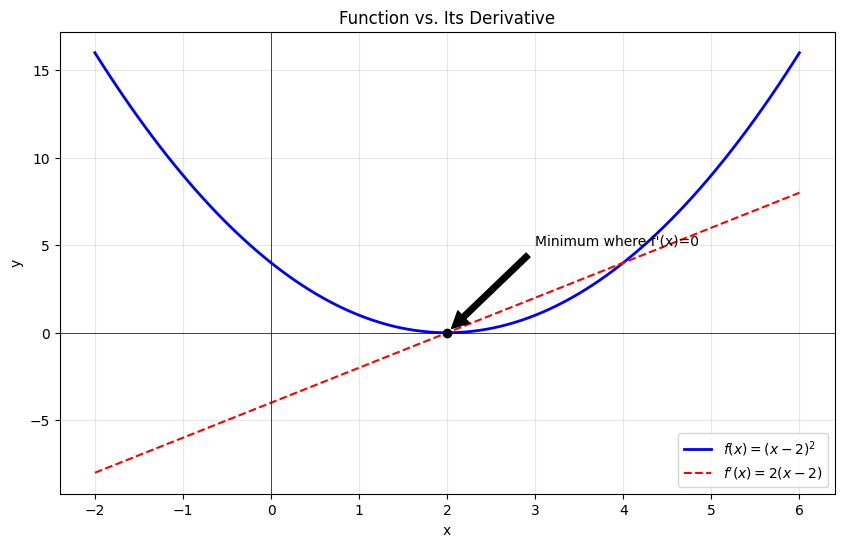

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Define the function: f(x) = (x - 2)^2
def f(x):
    return (x - 2)**2

#Define the derivative: f'(x) = 2(x - 2)
def df(x):
    return 2 * (x - 2)

#Create a range of x values using numpy
#From -2 to 6, with 100 points in between
x = np.linspace(-2, 6, 100)

#Calculate y values
y = f(x)
y_prime = df(x)

# Optional but helpful: Visualization
plt.figure(figsize=(10, 6))

# Plot the original function
plt.plot(x, y, label=r"$f(x) = (x-2)^2$", color='blue', lw=2)

# Plot the derivative
plt.plot(x, y_prime, label=r"$f'(x) = 2(x-2)$", color='red', linestyle='--')

# Add a marker at the minimum point (x=2)
plt.scatter(2, 0, color='black', zorder=5)
plt.annotate('Minimum where f\'(x)=0', (2, 0), xytext=(3, 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# DOn't confuse yourself here. I'm just adding axes through the origin
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("Function vs. Its Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, alpha=0.3)

# If you want to save, you can use the following lines
#plt.savefig('function_derivative.png')
#print("Plot saved as function_derivative.png")

For the function, $f(x)=(x-3)^2+3$, perform the steps above

Let's calculate the "best" x which can minimize f

In [14]:
import numpy as np

# Define the function and its MANUALLY calculated derivative
def f(x):
    return (x - 2)**2

def df(x):
    # This is the derivative: d/dx (x-2)^2 = 2(x-2)
    return 2 * (x - 2)

# Initialization
x = 5.0  # Starting point
learning_rate = 0.1 # we will see how to play with this
iterations = 20 # this is something you can change again

print(f"Starting at x = {x:.4f}\n")

for i in range(iterations):
    # Calculate the slope at the current x by calling the derivative function above
    slope = df(x)

    # Update x (The Step)
    # We subtract because if slope is positive, we want to go left
    x = x - (learning_rate * slope)

    if i % 2 == 0:
        current_y = f(x)
        print(f"Iteration {i}: x = {x:.4f}, y = {current_y:.4f}, Slope = {slope:.4f}")

print(f"\nFinal optimized x: {x:.4f}")

Starting at x = 5.0000

Iteration 0: x = 4.4000, y = 5.7600, Slope = 6.0000
Iteration 2: x = 3.5360, y = 2.3593, Slope = 3.8400
Iteration 4: x = 2.9830, y = 0.9664, Slope = 2.4576
Iteration 6: x = 2.6291, y = 0.3958, Slope = 1.5729
Iteration 8: x = 2.4027, y = 0.1621, Slope = 1.0066
Iteration 10: x = 2.2577, y = 0.0664, Slope = 0.6442
Iteration 12: x = 2.1649, y = 0.0272, Slope = 0.4123
Iteration 14: x = 2.1056, y = 0.0111, Slope = 0.2639
Iteration 16: x = 2.0676, y = 0.0046, Slope = 0.1689
Iteration 18: x = 2.0432, y = 0.0019, Slope = 0.1081

Final optimized x: 2.0346


Let's dive a little bit in PyTorch

In [4]:
import torch


# 1. Define the function
def f(x):
    return (x - 2)**2

# 2. Define the derivative manually
def df(x):
    return 2 * (x - 2)

# 3. Create values (torch.linspace instead of np.linspace)
x = torch.linspace(-2, 6, 100)

y = f(x)
y_prime = df(x)

In [3]:
print(y)

[1.60000000e+01 1.53600653e+01 1.47331905e+01 1.41193756e+01
 1.35186205e+01 1.29309254e+01 1.23562902e+01 1.17947148e+01
 1.12461994e+01 1.07107438e+01 1.01883481e+01 9.67901235e+00
 9.18273646e+00 8.69952046e+00 8.22936435e+00 7.77226814e+00
 7.32823181e+00 6.89725538e+00 6.47933884e+00 6.07448220e+00
 5.68268544e+00 5.30394858e+00 4.93827160e+00 4.58565453e+00
 4.24609734e+00 3.91960004e+00 3.60616264e+00 3.30578512e+00
 3.01846750e+00 2.74420977e+00 2.48301194e+00 2.23487399e+00
 1.99979594e+00 1.77777778e+00 1.56881951e+00 1.37292113e+00
 1.19008264e+00 1.02030405e+00 8.63585348e-01 7.19926538e-01
 5.89327620e-01 4.71788593e-01 3.67309458e-01 2.75890215e-01
 1.97530864e-01 1.32231405e-01 7.99918376e-02 4.08121620e-02
 1.46923783e-02 1.63248648e-03 1.63248648e-03 1.46923783e-02
 4.08121620e-02 7.99918376e-02 1.32231405e-01 1.97530864e-01
 2.75890215e-01 3.67309458e-01 4.71788593e-01 5.89327620e-01
 7.19926538e-01 8.63585348e-01 1.02030405e+00 1.19008264e+00
 1.37292113e+00 1.568819

#As you have noticed, I am still creating a function for the derivation. Let's see what else PyTorch can do for us

In [15]:
import torch

# linspace again, but note that with gradient tracking enabled
x = torch.linspace(-10, 10, 100, requires_grad=True)

# Let's remember our function again
def f(x):
    return (x - 2)**2

value = f(x)
print(value)
# Now, calculate the derivative automatically
# Since 'y' is a vector of 100 points, we tell PyTorch
# to calculate the derivative for each point individually.
value.backward(torch.ones_like(x))

# If you want to access the calculated derivative
y_prime_auto = x.grad
y_prime_auto

tensor([1.4400e+02, 1.3919e+02, 1.3447e+02, 1.2982e+02, 1.2526e+02, 1.2078e+02,
        1.1638e+02, 1.1206e+02, 1.0782e+02, 1.0367e+02, 9.9596e+01, 9.5605e+01,
        9.1695e+01, 8.7867e+01, 8.4120e+01, 8.0455e+01, 7.6872e+01, 7.3370e+01,
        6.9950e+01, 6.6612e+01, 6.3355e+01, 6.0180e+01, 5.7086e+01, 5.4074e+01,
        5.1144e+01, 4.8295e+01, 4.5528e+01, 4.2843e+01, 4.0239e+01, 3.7717e+01,
        3.5276e+01, 3.2917e+01, 3.0640e+01, 2.8444e+01, 2.6330e+01, 2.4298e+01,
        2.2347e+01, 2.0478e+01, 1.8690e+01, 1.6984e+01, 1.5360e+01, 1.3817e+01,
        1.2356e+01, 1.0977e+01, 9.6790e+00, 8.4628e+00, 7.3282e+00, 6.2753e+00,
        5.3039e+00, 4.4142e+00, 3.6062e+00, 2.8797e+00, 2.2349e+00, 1.6717e+00,
        1.1901e+00, 7.9012e-01, 4.7179e-01, 2.3508e-01, 7.9992e-02, 6.5299e-03,
        1.4692e-02, 1.0448e-01, 2.7589e-01, 5.2893e-01, 8.6359e-01, 1.2799e+00,
        1.7778e+00, 2.3573e+00, 3.0185e+00, 3.7612e+00, 4.5857e+00, 5.4917e+00,
        6.4793e+00, 7.5486e+00, 8.6995e+

tensor([-24.0000, -23.5960, -23.1919, -22.7879, -22.3838, -21.9798, -21.5758,
        -21.1717, -20.7677, -20.3636, -19.9596, -19.5556, -19.1515, -18.7475,
        -18.3434, -17.9394, -17.5354, -17.1313, -16.7273, -16.3232, -15.9192,
        -15.5152, -15.1111, -14.7071, -14.3030, -13.8990, -13.4949, -13.0909,
        -12.6869, -12.2828, -11.8788, -11.4747, -11.0707, -10.6667, -10.2626,
         -9.8586,  -9.4545,  -9.0505,  -8.6465,  -8.2424,  -7.8384,  -7.4343,
         -7.0303,  -6.6263,  -6.2222,  -5.8182,  -5.4141,  -5.0101,  -4.6061,
         -4.2020,  -3.7980,  -3.3939,  -2.9899,  -2.5859,  -2.1818,  -1.7778,
         -1.3737,  -0.9697,  -0.5657,  -0.1616,   0.2424,   0.6465,   1.0505,
          1.4545,   1.8586,   2.2626,   2.6667,   3.0707,   3.4747,   3.8788,
          4.2828,   4.6869,   5.0909,   5.4949,   5.8990,   6.3030,   6.7071,
          7.1111,   7.5152,   7.9192,   8.3232,   8.7273,   9.1313,   9.5354,
          9.9394,  10.3434,  10.7475,  11.1515,  11.5556,  11.95

#How can we find where the function, f, is the minimum? In other words, where is the best x?

In [12]:
import torch

# Initialize x at a "wrong" or random value (e.g., 5)
# requires_grad=True tells PyTorch to track the math for this variable. Don't get lost here. We will talk about this stuff again in the following lectures

def f(x):
  return (x-2)**2;

x = torch.tensor([5.0], requires_grad=True) # this is the rrandom initialization I did before


learning_rate = 0.1
iterations = 20

print(f"Starting at x = {x.item():.4f}")

for i in range(iterations):
    y = f(x)
    # Calculate the derivative (The Backward Pass)
    # This automatically finds that f'(x) = 2(x-2)
    y.backward()

    # Update x (The Gradient Descent Step)
    # We move x in the OPPOSITE direction of the slope
    with torch.no_grad():
        x -= learning_rate * x.grad

    # Clear the gradient for the next round
    x.grad.zero_()

    if i % 2 == 0:
        print(f"Iteration {i}: x = {x.item():.4f}, Slope = {2*(x.item()-2):.4f}")

print(f"\nFinal optimized x: {x.item():.4f}")

Starting at x = 5.0000
Iteration 0: x = 4.4000, Slope = 4.8000
Iteration 2: x = 3.5360, Slope = 3.0720
Iteration 4: x = 2.9830, Slope = 1.9661
Iteration 6: x = 2.6291, Slope = 1.2583
Iteration 8: x = 2.4027, Slope = 0.8053
Iteration 10: x = 2.2577, Slope = 0.5154
Iteration 12: x = 2.1649, Slope = 0.3299
Iteration 14: x = 2.1056, Slope = 0.2111
Iteration 16: x = 2.0676, Slope = 0.1351
Iteration 18: x = 2.0432, Slope = 0.0865

Final optimized x: 2.0346


#Let's visualize our progress for x

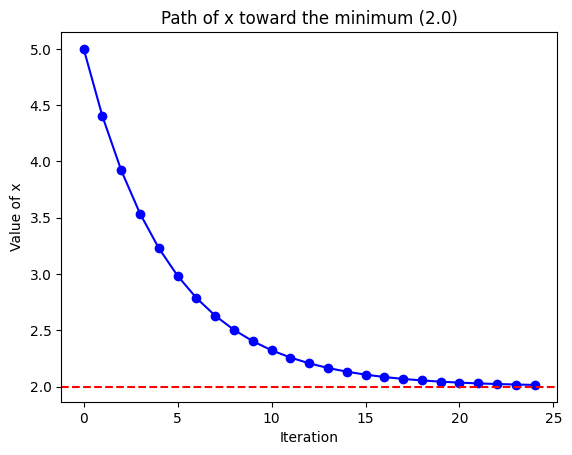

In [13]:
import torch
import matplotlib.pyplot as plt

def f(x):
  return (x-2)**2

x = torch.tensor([5.0], requires_grad=True)
learning_rate = 0.1
history_x = []
history_y = []

for i in range(25):
    y = f(x)

    # Store history for plotting
    history_x.append(x.item())
    history_y.append(y.item())

    y.backward()
    with torch.no_grad():
        x -= learning_rate * x.grad
    x.grad.zero_()

# Plotting the results
plt.plot(history_x, 'o-', color='blue')
plt.axhline(y=2, color='red', linestyle='--')
plt.title("Path of x toward the minimum (2.0)")
plt.xlabel("Iteration")
plt.ylabel("Value of x")
plt.show()

#If you need to automate, below is the way. However, we will delve into this later. I'm just leaving this example here for an early exposure

In [7]:
import torch

x = torch.tensor([5.0], requires_grad=True)

# SGD stands for Stochastic Gradient Descent
optimizer = torch.optim.SGD([x], lr=0.1)

for i in range(20):
    optimizer.zero_grad()   # Reset slopes to zero
    y = (x - 2)**2          # Calculate function
    y.backward()            # Calculate new slopes
    optimizer.step()        # Move x based on the slope

print(f"Optimized x: {x.item():.4f}")

Optimized x: 2.0346
